## **Unziping the file**

In [ ]:
! unzip '/content/drive/MyDrive/txt_reviews.zip' -d '/content/sample_data'

Streaming output truncated to the last 5000 lines.
  inflating: /content/sample_data/txt_reviews/review_95499.txt  
  inflating: /content/sample_data/txt_reviews/review_955.txt  
  inflating: /content/sample_data/txt_reviews/review_9550.txt  
  inflating: /content/sample_data/txt_reviews/review_95500.txt  
  inflating: /content/sample_data/txt_reviews/review_95501.txt  
  inflating: /content/sample_data/txt_reviews/review_95502.txt  
  inflating: /content/sample_data/txt_reviews/review_95503.txt  
  inflating: /content/sample_data/txt_reviews/review_95504.txt  
  inflating: /content/sample_data/txt_reviews/review_95505.txt  
  inflating: /content/sample_data/txt_reviews/review_95506.txt  
  inflating: /content/sample_data/txt_reviews/review_95507.txt  
  inflating: /content/sample_data/txt_reviews/review_95508.txt  
  inflating: /content/sample_data/txt_reviews/review_95509.txt  
  inflating: /content/sample_data/txt_reviews/review_9551.txt  
  inflating: /content/sample_data/txt_revie

## **Importing Libraries**

In [56]:
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datetime import datetime
import os
import nltk
from textblob import TextBlob,Word
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
nltk.download('stopwords')
sw=stopwords.words("english")
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from tqdm import tqdm,tqdm_notebook
tqdm.pandas()

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer

from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn import metrics


import re

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
files=os.listdir("/content/sample_data/txt_reviews")
print("No. of files:",len(files))

No. of files: 568454


In [ ]:
files[0]

'review_458469.txt'

In [ ]:
file_1=open("/content/sample_data/txt_reviews//review_458469.txt")
lines_1=file_1.readlines()
print(type(lines_1[0]))
lines_1

<class 'str'>


['ProductId: B000YQJ0EW\n',
 'UserId: A2ZSC81MXLBELX\n',
 'ProfileName: L. Shirley "Laurie\'s Boomer Views"\n',
 'HelpfulnessNumerator: 0\n',
 'HelpfulnessDenominator: 0\n',
 'Score: 5\n',
 'Time: 1291852800\n',
 'ReviewSummary: A Tisket, A Tasket, Gift A Gourmet Basket\n',
 'ReviewText: Art of Appreciation Gift Basket service truly has their art mastered. The basket I ordered and had sent to friends - several states away - was received with quite some delight. I was told it was beautifully created and carefully packaged. All the items described on the sales page were included and were an excellent quality as well as "alot of stuff" as my friend said. As I spoke with her on the phone - and she was sampling the goods - I could hear many "mmms" and was assured there were some delicious treats. The note card that I was able to fill out at the time I placed my ordered was included as well.<br /><br />I ordered this on 11/22 and it was delivered on 12/3.It shipped on 11/24. Taking into cons

In [ ]:
ProductId=[]
UserId=[]
ProfileName=[]
HelpfulnessNumerator=[]
HelpfulnessDenominator=[]
Score=[]
Time=[]
ReviewSummary=[]
ReviewText=[]

for file in files:
  file=open("/content/sample_data/txt_reviews//"+file,"r",encoding = "utf-8")
  lines=file.readlines()
  ProductId.append(lines[0].split(":")[1].strip("\n"))
  UserId.append(lines[1].split(":")[1].strip("\n"))
  ProfileName.append(lines[2].split(":")[1].strip("\n"))
  HelpfulnessNumerator.append(lines[3].split(":")[1].strip("\n"))
  HelpfulnessDenominator.append(lines[4].split(":")[1].strip("\n"))
  Score.append(lines[5].split(":")[1].strip("\n"))
  Time.append(lines[6].split(":")[1].strip("\n"))
  ReviewSummary.append(lines[7].split(":")[1].strip("\n"))
  ReviewText.append(lines[8].split(":")[1].strip("\n"))



In [ ]:
print(len(ProductId), len(UserId),len(ProfileName),len(HelpfulnessNumerator),len(HelpfulnessDenominator),len(Score),len(Time),len(ReviewSummary),len(ReviewText),sep="\n")

568454
568454
568454
568454
568454
568454
568454
568454
568454


In [ ]:
df_reviews=pd.DataFrame({"ProductId": ProductId,
                         "UserId": UserId,
                         "ProfileName": ProfileName,
                         "HelpfulnessNumerator": HelpfulnessNumerator,
                         "HelpfulnessDenominator": HelpfulnessDenominator,
                         "Score": Score,
                         "Time": Time,
                         "ReviewSummary": ReviewSummary,
                         "ReviewText": ReviewText})

## **Opening the CSV file**

In [2]:
reviews = pd.read_csv("/content/drive/MyDrive/txt_reviews.csv")

In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ProductId               568454 non-null  object
 1   UserId                  568454 non-null  object
 2   ProfileName             568454 non-null  object
 3   HelpfulnessNumerator    568454 non-null  int64 
 4   HelpfulnessDenominator  568454 non-null  int64 
 5   Score                   568454 non-null  int64 
 6   Time                    568454 non-null  int64 
 7   ReviewSummary           568454 non-null  object
 8   ReviewText              568454 non-null  object
dtypes: int64(4), object(5)
memory usage: 39.0+ MB


In [4]:
reviews.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,1.743817,2.22881,4.183199,1.296257e+09
std,7.636513,8.28974,1.310436,4.804331e+07
min,0.000000,0.00000,1.000000,9.393408e+08
25%,0.000000,0.00000,4.000000,1.271290e+09
50%,0.000000,1.00000,5.000000,1.311120e+09
75%,2.000000,2.00000,5.000000,1.332720e+09
max,866.000000,923.00000,5.000000,1.351210e+09


In [5]:
reviews.shape

(568454, 9)

In [6]:
# Giving reviews with Score > 3 a positive rating, and reviews with a Score < 3 a negative rating.
def rating(x):
    if x < 3:
        return 0 # indicating negative
    return 1 # indicating positive

reviews['Score'] = reviews['Score'].map(rating)

In [7]:
reviews['Time'].nunique()

3168

### **Removing Duplicates From the Data**

In [8]:
reviews.duplicated().sum()

288

In [9]:
reviews.drop_duplicates(inplace=True)
reviews.duplicated().sum()

0

In [10]:
reviews.isnull().sum()

ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [11]:
reviews.shape

(568166, 9)

### **Data Cleaning**

In [18]:
def deconstruct(phrase):
  phrase = re.sub(r"won't", "will not", phrase)
  phrase = re.sub(r"can\'t", "can not", phrase)

  phrase = re.sub(r"n\'t", "not", phrase)
  phrase = re.sub(r"\'re", "are", phrase)
  phrase = re.sub(r"\'s", "is", phrase)
  phrase = re.sub(r"\'d", "would", phrase)
  phrase = re.sub(r"\'ll", "will", phrase)
  phrase = re.sub(r"\'ve", "have", phrase)
  phrase = re.sub(r"\'m", "am", phrase)
  return phrase

In [22]:
stopwords = set(["br", "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "above", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"])

In [23]:
from tqdm import tqdm
preprocessed_reviewsText = []

for sent in tqdm(reviews['ReviewText'].values):
    sent = re.sub("\S*\d\S*", "", sent)
    sent = BeautifulSoup(sent, 'lxml').get_text()
    sent = re.sub("\S*\d\S*", "", sent)
    sent = deconstruct(sent)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_reviewsText.append(sent.strip())


100%|██████████| 568166/568166 [05:00<00:00, 1890.63it/s]


In [24]:
preprocessed_reviewsText[100]

'lucky grateful gotten box wonderful food could called vegan starter kit eat foods itis starter kit like put foods kit comes oz bag lentils oz bag munga beans oz bag quinoa oz liquid aminos oz herbs spices seasoning organic course also recipe cards already ate lentils mungas seasoning added fresh tomatoes fresh onions sea salt dinner tonight really good fact excellent love kit remainder last long course consuming aminos soy one bottle take away star rest contents enough make love herbs spices seasoning think many things used wait try mashed potatoes try tomorrow love kit wholesome awesome healthy filling tasty bad reach sky get stars review enough'

In [25]:
from tqdm import tqdm
preprocessed_reviewsSummary = []

for sent in tqdm(reviews['ReviewSummary'].values):
    sent = re.sub("\S*\d\S*", "", sent)
    sent = BeautifulSoup(sent, 'lxml').get_text()
    sent = re.sub("\S*\d\S*", "", sent)
    sent = deconstruct(sent)
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_reviewsSummary.append(sent.strip())

100%|██████████| 568166/568166 [03:08<00:00, 3012.20it/s]


In [27]:
reviews['ReviewText']=preprocessed_reviewsText
reviews['ReviewSummary']=preprocessed_reviewsSummary

In [28]:
reviews.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B000YQJ0EW,A2ZSC81MXLBELX,"L. Shirley ""Laurie's Boomer Views""",0,0,1,1291852800,tisket tasket gift gourmet basket,art appreciation gift basket service truly art...
1,B004FGWU9O,ANOD28P22F3YO,jazzy,0,0,1,1324252800,good coffee,really impressed coffee nice bold taste yet sm...
2,B000M0F58U,A2N0XGXKS9KTCK,"M. Wilkinson ""Pandorasboxbytina""",5,5,1,1210550400,works,use help jump start weight loss regime sometim...
3,B0008JGWC8,A3MG3S1UJRDMA4,K. Brown,3,3,1,1216080000,superior vinegar,superior vinegar tart tangy along lines red wi...
4,B0033V8VSQ,A1ISBJPGE0QIE5,R. Del Valle,0,0,1,1317254400,great tasting hot sauce,one favorite sauces ihave tried ihave tried to...


In [30]:
reviews['Score'].value_counts()

1    486170
0     81996
Name: Score, dtype: int64

## **WordCloud**

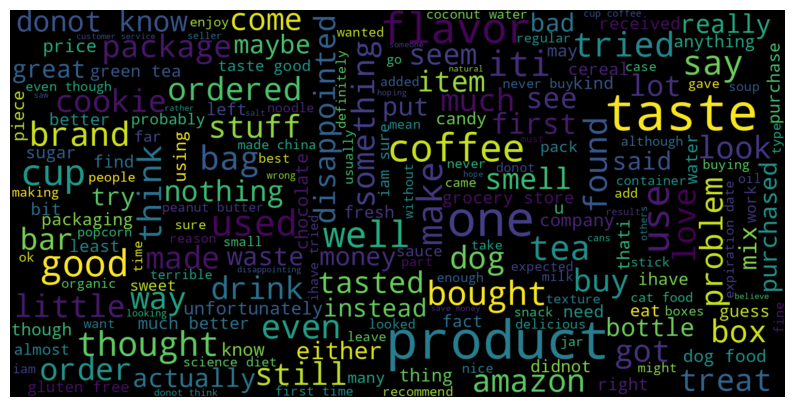

In [32]:
consolidated=' '.join(word for word in reviews['ReviewText'][reviews['Score']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(10,7))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

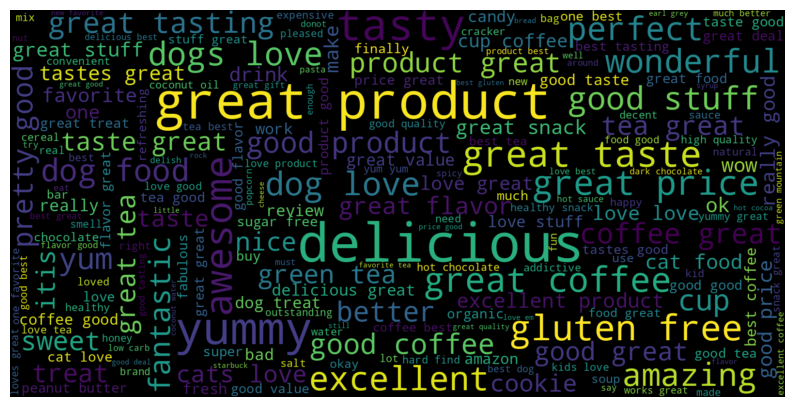

In [33]:
consolidated=' '.join(word for word in reviews['ReviewSummary'][reviews['Score']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(10,7))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
x=reviews[["ReviewSummary","ReviewText"]].fillna("")
y=reviews["Score"]

## **Splitting the Train and Test data**

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=50)

#checking with shape
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(397716, 2) (170450, 2)
(397716,) (170450,)


## **Creating Bag of words**

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
bowRS=CountVectorizer()
bowRT=CountVectorizer()

In [37]:
X_train_bow_RS=bowRS.fit_transform(X_train["ReviewSummary"])
X_train_bow_RT=bowRT.fit_transform(X_train["ReviewText"])

In [38]:
#Checking with Total Number of Unique Words
print("Total unique words:", len(bowRS.vocabulary_))
print("Total unique words:", len(bowRT.vocabulary_))


Total unique words: 28886
Total unique words: 99134


In [39]:
X_test_bow_Rs=bowRS.transform(X_test["ReviewSummary"])
X_test_bow_RT=bowRT.transform(X_test["ReviewText"])

In [40]:
from scipy.sparse import hstack

In [41]:
X_train_trans1=hstack((X_train_bow_RS,X_train_bow_RT))
X_test_trans1=hstack((X_test_bow_Rs,X_test_bow_RT))

# **Model Building**

## Naive Bayes

In [42]:
#MultiNomialNaiveBayes
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()

#Training The Model
mnb.fit(X_train_trans1,y_train)

#Predicting the Model
y_mnb_pred=mnb.predict(X_test_trans1)

#Evaluating the Model
from sklearn import metrics
mnbScore=metrics.accuracy_score(y_test,y_mnb_pred)

print("Accuracy:",mnbScore*100)
print("Classification Report:\n",metrics.classification_report(y_test,y_mnb_pred))

Accuracy: 91.75066001760047
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72     24511
           1       0.96      0.95      0.95    145939

    accuracy                           0.92    170450
   macro avg       0.83      0.84      0.84    170450
weighted avg       0.92      0.92      0.92    170450



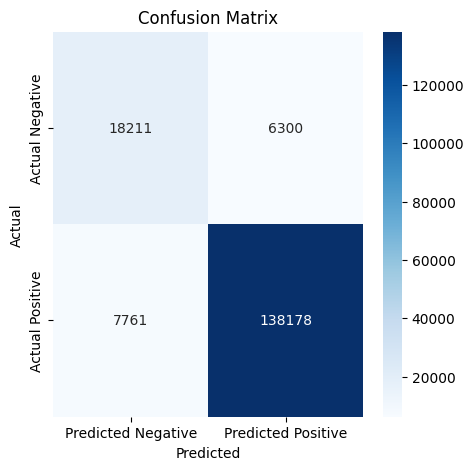

In [49]:
# Confusion matrix
cm = confusion_matrix(y_test, y_mnb_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

## Logistic Regression

In [46]:
#logistic Regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

#Training the model
lg.fit(X_train_trans1,y_train)

#Preidict the model
y_lg_pred=lg.predict(X_test_trans1)

#Evaluating the Model
from sklearn import metrics
lgScore=metrics.accuracy_score(y_test,y_lg_pred)


print("Accurracy:",lgScore*100)
print("Classification Report:\n",metrics.classification_report(y_test,y_lg_pred))

Accurracy: 94.07568201818715
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78     24511
           1       0.96      0.98      0.97    145939

    accuracy                           0.94    170450
   macro avg       0.89      0.86      0.87    170450
weighted avg       0.94      0.94      0.94    170450



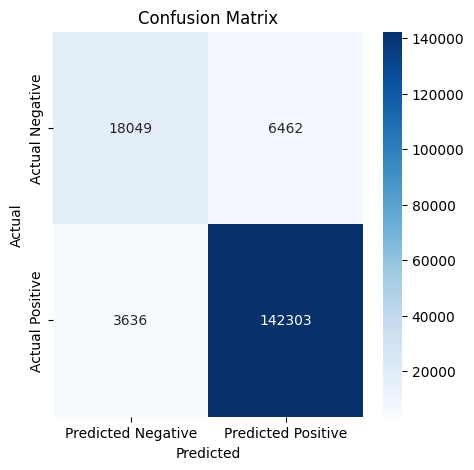

In [48]:
# Confusion matrix
cm = confusion_matrix(y_test, y_lg_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [51]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=2)

#Training the Model
dt.fit(X_train_trans1, y_train)

#Predict the Model
y_dt_pred=dt.predict(X_test_trans1)

#Evaluating the Model
from sklearn import metrics
dt_score=metrics.accuracy_score(y_test,y_dt_pred)

print("Accuracy:",dt_score*100)
print("Classification Report:\n",metrics.classification_report(y_test,y_dt_pred))

Accuracy: 85.90378410090935
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.03      0.06     24511
           1       0.86      1.00      0.92    145939

    accuracy                           0.86    170450
   macro avg       0.80      0.51      0.49    170450
weighted avg       0.84      0.86      0.80    170450



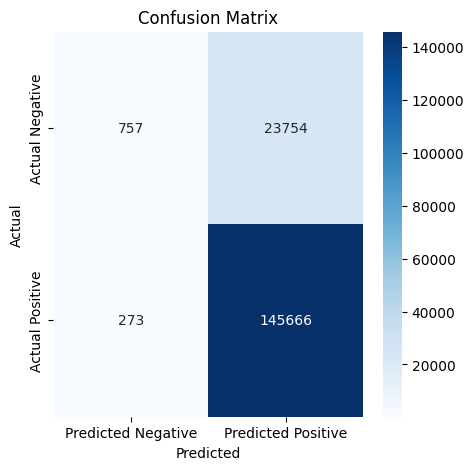

In [52]:
# Confusion matrix
cm = confusion_matrix(y_test, y_dt_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

## **Evaluate the performance of a model**

In [53]:
#calculating the F1-score
lg_f1=metrics.f1_score(y_test,y_lg_pred,pos_label="positive",average="weighted")
mnb_f1=metrics.f1_score(y_test,y_mnb_pred,pos_label="positive",average="weighted")
dt_f1=metrics.f1_score(y_test,y_dt_pred,pos_label="positive",average="weighted")

In [54]:
from nltk.metrics.scores import accuracy
#creating lists for respective metrics
accuracy=[mnbScore*100,lgScore*100,dt_score*100]
f1=[mnb_f1*100,lg_f1*100,dt_f1*100,]
model=["Naive Bayes","Logistic Regression", "Decisison Trees"]

In [55]:
comparison=pd.DataFrame({"Model":model,
                    "Accuracy":accuracy,
                    "F1_Score":f1})
comparison

,Model,Accuracy,F1_Score
0,Naive Bayes,91.750660,91.849280
1,Logistic Regression,94.075682,93.922880
2,Decisison Trees,85.903784,79.948927


#### **Conclusion:** The results of the evaluation using F1 score as the metric shows that , Logistic Regression Performing well compared to other models, with a score of 93.92%.